In [1]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 12.0 MB/s 
     |████████████████████████████████| 441 kB 38.3 MB/s 
     |████████████████████████████████| 163 kB 61.9 MB/s 
     |████████████████████████████████| 7.6 MB 49.1 MB/s 
     |████████████████████████████████| 95 kB 4.7 MB/s 
     |████████████████████████████████| 115 kB 68.3 MB/s 
     |████████████████████████████████| 212 kB 66.6 MB/s 
     |████████████████████████████████| 127 kB 58.4 MB/s 
     |████████████████████████████████| 115 kB 63.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [2]:
from datasets import load_dataset

dataset = load_dataset("food101", split="train[:100]")

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295. Subsequent calls will reuse this data.


In [4]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

In [6]:
dataset[3]["image"]

from torchvision.transforms import Compose, Normalize, RandomResizedCrop, ColorJitter, ToTensor

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
_transforms = Compose(
    [RandomResizedCrop(feature_extractor.size), ColorJitter(brightness=0.5, hue=0.5), ToTensor(), normalize]
)

def transforms(examples):
    examples["pixel_values"] = [_transforms(image.convert("RGB")) for image in examples["image"]]
    return examples

In [9]:
dataset.set_transform(transforms)

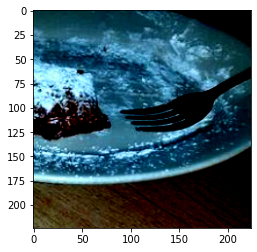

In [13]:
dataset[0]
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))